### Importer les Librairies

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from extractFeatures import *

### Chargement du Dataset

In [2]:
file_path = r'dataset/df18.csv'

df = pd.read_csv(file_path,
                  on_bad_lines='skip',
                  encoding="latin-1")

df.head(10)

,Unnamed: 0,password,length,upper,lower,digit,spe,strength
0,0,juansoto11,10,0,8,2,0,moyen
1,1,Igot99,6,1,3,2,0,moyen
2,2,iluvmyaar0n,11,0,10,1,0,moyen
3,3,nurotop,7,0,7,0,0,faible
4,4,nineravens,10,0,10,0,0,faible
5,5,536638,6,0,0,6,0,faible
6,6,jessiejean,10,0,10,0,0,faible
7,7,mytuja,6,0,6,0,0,faible
8,8,amstafleuta,11,0,11,0,0,faible
9,9,THEBOYNEXTDOOR,14,14,0,0,0,moyen


In [3]:
df.shape

(9370, 8)

In [4]:
df.isnull().sum()

Unnamed: 0    0
password      0
length        0
upper         0
lower         0
digit         0
spe           0
strength      0
dtype: int64

In [5]:
df["strength"].value_counts()

strength
moyen     4770
faible    4559
fort        41
Name: count, dtype: int64

<Axes: xlabel='strength', ylabel='count'>

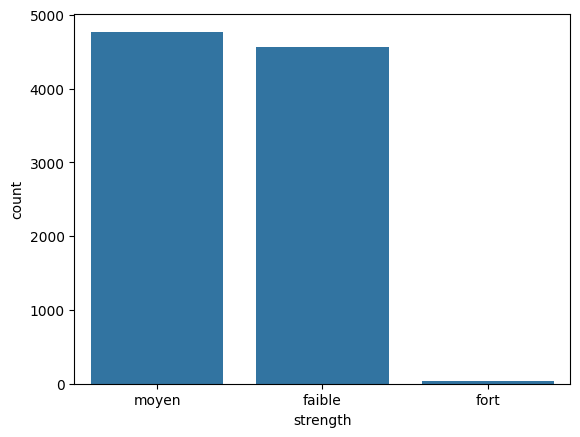

In [6]:
sns.countplot(x = 'strength', data = df)

### Application du Modèle Supervisé

In [7]:
# Convertir les labels en valeurs numériques
label_mapping = {'faible': 0, 'moyen': 1, 'fort': 2}
df['strength'] = df['strength'].map(label_mapping)

# Separer Caracteristique et Labels
X = df[['length', 'upper', 'lower', 'digit', 'spe']]
y = df['strength']

# Diviser les donnees entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Modele KNN

In [ ]:
# Initialiser et entrainer le modele knn
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

# Prediction et Evaluation du modele
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(8, 6))
df['strength'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Password Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Scatter plot to show the relationship between length and strength
plt.figure(figsize=(8, 6))
plt.scatter(df['length'], df['strength'], c='green', alpha=0.6)
plt.title('Password Length vs. Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.show()

In [ ]:
# Prepare data for a stacked bar chart
df_grouped = df.groupby('strength').mean(numeric_only='true')[['upper', 'lower', 'digit', 'spe']]

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'green', 'red'])
plt.title('Character Composition Impact on Password Strength')
plt.xlabel('Password Strength')
plt.ylabel('Average Count of Characters')
plt.legend(title='Character Types', loc='upper left')
plt.show()


In [29]:
def test_input():
    user_inp = input()
    user_inp_f = np.array(extract_features(user_inp)).reshape(1, -1)
    #print(user_inp_f)
    df_inp = pd.DataFrame(user_inp_f, columns=['password', 'length', 'upper', 'lower', 'digit', 'spe', 'strength'])
    inp_x = df_inp[['length', 'upper', 'lower', 'digit', 'spe']].values
    inp_y = df_inp['strength']
    inp_pred = scaler.transform(inp_x)

    #print(df_inp)

    strength = knn.predict(scaler.transform(inp_x))

    return strength

In [ ]:
print(test_input())